## Modeling Credit Default

#### Fonte: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

## Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
import itertools
from pylab import rcParams
import matplotlib.pyplot as plt
from IPython.display import HTML

from sklearn import model_selection
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
import shap

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from datetime import datetime, timedelta
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import optimizers
from keras import backend as K
import keras

pd.set_option('max_columns', 50)
%matplotlib inline

shap.initjs()

Using TensorFlow backend.


## Variavis Globais

In [2]:
# Classes
classes=['Não Inadimplente',
         'Inadimplente']

lista_colunas = ['Limite',
'Genero',
'Grau_Educacao',
'Matrimonio',
'Idade',
'Status_Pagamento_1',
'Status_Pagamento_2',
'Status_Pagamento_3',
'Status_Pagamento_4',
'Status_Pagamento_5',
'Status_Pagamento_6',
'Conta_Valor_1',
'Conta_Valor_2',
'Conta_Valor_3',
'Conta_Valor_4',
'Conta_Valor_5',
'Conta_Valor_6',
'Pagamento_Valor_1',
'Pagamento_Valor_2',
'Pagamento_Valor_3',
'Pagamento_Valor_4',
'Pagamento_Valor_5',
'Pagamento_Valor_6',
'Inadimplente']

lista_colunas_train_full = ['Limite',
'Limite_norm',
'Genero',
'Status_Pagamento_1',
'Status_Pagamento_2',
'Status_Pagamento_3',
'Status_Pagamento_4',
'Status_Pagamento_5',
'Status_Pagamento_6',
'Grau_Educacao_0',
'Grau_Educacao_1',
'Grau_Educacao_2',
'Grau_Educacao_3',
'Grau_Educacao_4',
'Grau_Educacao_5',
'Grau_Educacao_6',
'Matrimonio_0',
'Matrimonio_1',
'Matrimonio_2',
'Matrimonio_3',
'Idade_norm',
'Status_Pagamento_1_-2',
'Status_Pagamento_1_-1',
'Status_Pagamento_1_0',
'Status_Pagamento_1_1',
'Status_Pagamento_1_2',
'Status_Pagamento_1_3',
'Status_Pagamento_1_4',
'Status_Pagamento_1_5',
'Status_Pagamento_1_6',
'Status_Pagamento_1_7',
'Status_Pagamento_1_8',
'Status_Pagamento_2_-2',
'Status_Pagamento_2_-1',
'Status_Pagamento_2_0',
'Status_Pagamento_2_1',
'Status_Pagamento_2_2',
'Status_Pagamento_2_3',
'Status_Pagamento_2_4',
'Status_Pagamento_2_5',
'Status_Pagamento_2_6',
'Status_Pagamento_2_7',
'Status_Pagamento_2_8',
'Status_Pagamento_3_-2',
'Status_Pagamento_3_-1',
'Status_Pagamento_3_0',
'Status_Pagamento_3_1',
'Status_Pagamento_3_2',
'Status_Pagamento_3_3',
'Status_Pagamento_3_4',
'Status_Pagamento_3_5',
'Status_Pagamento_3_6',
'Status_Pagamento_3_7',
'Status_Pagamento_3_8',
'Status_Pagamento_4_-2',
'Status_Pagamento_4_-1',
'Status_Pagamento_4_0',
'Status_Pagamento_4_1',
'Status_Pagamento_4_2',
'Status_Pagamento_4_3',
'Status_Pagamento_4_4',
'Status_Pagamento_4_5',
'Status_Pagamento_4_6',
'Status_Pagamento_4_7',
'Status_Pagamento_4_8',
'Status_Pagamento_5_-2',
'Status_Pagamento_5_-1',
'Status_Pagamento_5_0',
'Status_Pagamento_5_2',
'Status_Pagamento_5_3',
'Status_Pagamento_5_4',
'Status_Pagamento_5_5',
'Status_Pagamento_5_6',
'Status_Pagamento_5_7',
'Status_Pagamento_5_8',
'Status_Pagamento_6_-2',
'Status_Pagamento_6_-1',
'Status_Pagamento_6_0',
'Status_Pagamento_6_2',
'Status_Pagamento_6_3',
'Status_Pagamento_6_4',
'Status_Pagamento_6_5',
'Status_Pagamento_6_6',
'Status_Pagamento_6_7',
'Status_Pagamento_6_8',
'Conta_Valor_1_norm',
'Conta_Valor_2_norm',
'Conta_Valor_3_norm',
'Conta_Valor_4_norm',
'Conta_Valor_5_norm',
'Conta_Valor_6_norm',
'Pagamento_Valor_1_norm',
'Pagamento_Valor_2_norm',
'Pagamento_Valor_3_norm',
'Pagamento_Valor_4_norm',
'Pagamento_Valor_5_norm',
'Pagamento_Valor_6_norm',
'Grau_Educacao',
'Matrimonio',
'Idade',
'Conta_Valor_1',
'Conta_Valor_2',
'Conta_Valor_3',
'Conta_Valor_4',
'Conta_Valor_5',
'Conta_Valor_6',
'Pagamento_Valor_1',
'Pagamento_Valor_2',
'Pagamento_Valor_3',
'Pagamento_Valor_4',
'Pagamento_Valor_5',
'Pagamento_Valor_6']


lista_colunas_train_sem_norm_sem_one_hot = ['Limite',
'Genero',
'Grau_Educacao',
'Matrimonio',
'Idade',
'Status_Pagamento_1',
'Status_Pagamento_2',
'Status_Pagamento_3',
'Status_Pagamento_4',
'Status_Pagamento_5',
'Status_Pagamento_6',
'Conta_Valor_1',
'Conta_Valor_2',
'Conta_Valor_3',
'Conta_Valor_4',
'Conta_Valor_5',
'Conta_Valor_6',
'Pagamento_Valor_1',
'Pagamento_Valor_2',
'Pagamento_Valor_3',
'Pagamento_Valor_4',
'Pagamento_Valor_5',
'Pagamento_Valor_6']

lista_colunas_train_sem_norm_com_one_hot = ['Limite',
'Genero',
'Grau_Educacao',
'Matrimonio',
'Idade',
'Status_Pagamento_1',
'Status_Pagamento_2',
'Status_Pagamento_3',
'Status_Pagamento_4',
'Status_Pagamento_5',
'Status_Pagamento_6',
'Conta_Valor_1',
'Conta_Valor_2',
'Conta_Valor_3',
'Conta_Valor_4',
'Conta_Valor_5',
'Conta_Valor_6',
'Pagamento_Valor_1',
'Pagamento_Valor_2',
'Pagamento_Valor_3',
'Pagamento_Valor_4',
'Pagamento_Valor_5',
'Pagamento_Valor_6',
'Grau_Educacao_0',
'Grau_Educacao_1',
'Grau_Educacao_2',
'Grau_Educacao_3',
'Grau_Educacao_4',
'Grau_Educacao_5',
'Grau_Educacao_6',
'Matrimonio_0',
'Matrimonio_1',
'Matrimonio_2',
'Matrimonio_3']


lista_colunas_train_com_norm_sem_one_hot = ['Limite_norm',
'Genero',
'Grau_Educacao',
'Matrimonio',
'Idade_norm',
'Status_Pagamento_1_-2',
'Status_Pagamento_1_-1',
'Status_Pagamento_1_0',
'Status_Pagamento_1_1',
'Status_Pagamento_1_2',
'Status_Pagamento_1_3',
'Status_Pagamento_1_4',
'Status_Pagamento_1_5',
'Status_Pagamento_1_6',
'Status_Pagamento_1_7',
'Status_Pagamento_1_8',
'Status_Pagamento_2_-2',
'Status_Pagamento_2_-1',
'Status_Pagamento_2_0',
'Status_Pagamento_2_1',
'Status_Pagamento_2_2',
'Status_Pagamento_2_3',
'Status_Pagamento_2_4',
'Status_Pagamento_2_5',
'Status_Pagamento_2_6',
'Status_Pagamento_2_7',
'Status_Pagamento_2_8',
'Status_Pagamento_3_-2',
'Status_Pagamento_3_-1',
'Status_Pagamento_3_0',
'Status_Pagamento_3_1',
'Status_Pagamento_3_2',
'Status_Pagamento_3_3',
'Status_Pagamento_3_4',
'Status_Pagamento_3_5',
'Status_Pagamento_3_6',
'Status_Pagamento_3_7',
'Status_Pagamento_3_8',
'Status_Pagamento_4_-2',
'Status_Pagamento_4_-1',
'Status_Pagamento_4_0',
'Status_Pagamento_4_1',
'Status_Pagamento_4_2',
'Status_Pagamento_4_3',
'Status_Pagamento_4_4',
'Status_Pagamento_4_5',
'Status_Pagamento_4_6',
'Status_Pagamento_4_7',
'Status_Pagamento_4_8',
'Status_Pagamento_5_-2',
'Status_Pagamento_5_-1',
'Status_Pagamento_5_0',
'Status_Pagamento_5_2',
'Status_Pagamento_5_3',
'Status_Pagamento_5_4',
'Status_Pagamento_5_5',
'Status_Pagamento_5_6',
'Status_Pagamento_5_7',
'Status_Pagamento_5_8',
'Status_Pagamento_6_-2',
'Status_Pagamento_6_-1',
'Status_Pagamento_6_0',
'Status_Pagamento_6_2',
'Status_Pagamento_6_3',
'Status_Pagamento_6_4',
'Status_Pagamento_6_5',
'Status_Pagamento_6_6',
'Status_Pagamento_6_7',
'Status_Pagamento_6_8',
'Conta_Valor_1_norm',
'Conta_Valor_2_norm',
'Conta_Valor_3_norm',
'Conta_Valor_4_norm',
'Conta_Valor_5_norm',
'Conta_Valor_6_norm',
'Pagamento_Valor_1_norm',
'Pagamento_Valor_2_norm',
'Pagamento_Valor_3_norm',
'Pagamento_Valor_4_norm',
'Pagamento_Valor_5_norm',
'Pagamento_Valor_6_norm']

lista_colunas_train_com_norm_com_one_hot = ['Limite_norm',
'Genero',
'Grau_Educacao_0',
'Grau_Educacao_1',
'Grau_Educacao_2',
'Grau_Educacao_3',
'Grau_Educacao_4',
'Grau_Educacao_5',
'Grau_Educacao_6',
'Matrimonio_0',
'Matrimonio_1',
'Matrimonio_2',
'Matrimonio_3',
'Idade_norm',
'Status_Pagamento_1_-2',
'Status_Pagamento_1_-1',
'Status_Pagamento_1_0',
'Status_Pagamento_1_1',
'Status_Pagamento_1_2',
'Status_Pagamento_1_3',
'Status_Pagamento_1_4',
'Status_Pagamento_1_5',
'Status_Pagamento_1_6',
'Status_Pagamento_1_7',
'Status_Pagamento_1_8',
'Status_Pagamento_2_-2',
'Status_Pagamento_2_-1',
'Status_Pagamento_2_0',
'Status_Pagamento_2_1',
'Status_Pagamento_2_2',
'Status_Pagamento_2_3',
'Status_Pagamento_2_4',
'Status_Pagamento_2_5',
'Status_Pagamento_2_6',
'Status_Pagamento_2_7',
'Status_Pagamento_2_8',
'Status_Pagamento_3_-2',
'Status_Pagamento_3_-1',
'Status_Pagamento_3_0',
'Status_Pagamento_3_1',
'Status_Pagamento_3_2',
'Status_Pagamento_3_3',
'Status_Pagamento_3_4',
'Status_Pagamento_3_5',
'Status_Pagamento_3_6',
'Status_Pagamento_3_7',
'Status_Pagamento_3_8',
'Status_Pagamento_4_-2',
'Status_Pagamento_4_-1',
'Status_Pagamento_4_0',
'Status_Pagamento_4_1',
'Status_Pagamento_4_2',
'Status_Pagamento_4_3',
'Status_Pagamento_4_4',
'Status_Pagamento_4_5',
'Status_Pagamento_4_6',
'Status_Pagamento_4_7',
'Status_Pagamento_4_8',
'Status_Pagamento_5_-2',
'Status_Pagamento_5_-1',
'Status_Pagamento_5_0',
'Status_Pagamento_5_2',
'Status_Pagamento_5_3',
'Status_Pagamento_5_4',
'Status_Pagamento_5_5',
'Status_Pagamento_5_6',
'Status_Pagamento_5_7',
'Status_Pagamento_5_8',
'Status_Pagamento_6_-2',
'Status_Pagamento_6_-1',
'Status_Pagamento_6_0',
'Status_Pagamento_6_2',
'Status_Pagamento_6_3',
'Status_Pagamento_6_4',
'Status_Pagamento_6_5',
'Status_Pagamento_6_6',
'Status_Pagamento_6_7',
'Status_Pagamento_6_8',
'Conta_Valor_1_norm',
'Conta_Valor_2_norm',
'Conta_Valor_3_norm',
'Conta_Valor_4_norm',
'Conta_Valor_5_norm',
'Conta_Valor_6_norm',
'Pagamento_Valor_1_norm',
'Pagamento_Valor_2_norm',
'Pagamento_Valor_3_norm',
'Pagamento_Valor_4_norm',
'Pagamento_Valor_5_norm',
'Pagamento_Valor_6_norm']


dict_tipos = {'Limite':float,
'Genero':int,
'Grau_Educacao':int,
'Matrimonio':int,
'Idade':float,
'Status_Pagamento_1':int,
'Status_Pagamento_2':int,
'Status_Pagamento_3':int,
'Status_Pagamento_4':int,
'Status_Pagamento_5':int,
'Status_Pagamento_6':int,
'Conta_Valor_1':float,
'Conta_Valor_2':float,
'Conta_Valor_3':float,
'Conta_Valor_4':float,
'Conta_Valor_5':float,
'Conta_Valor_6':float,
'Pagamento_Valor_1':float,
'Pagamento_Valor_2':float,
'Pagamento_Valor_3':float,
'Pagamento_Valor_4':float,
'Pagamento_Valor_5':float,
'Pagamento_Valor_6':float,
'Inadimplente':int}

In [3]:
lista_top_vars_com_norm_com_onehot = ['Status_Pagamento_1_0',
'Status_Pagamento_1_2',
'Status_Pagamento_1_3',
'Status_Pagamento_1_-2',
'Status_Pagamento_4_5',
'Grau_Educacao_0',
'Matrimonio_0',
'Status_Pagamento_2_4',
'Grau_Educacao_5',
'Status_Pagamento_4_6',
'Status_Pagamento_6_6',
'Status_Pagamento_2_6',
'Status_Pagamento_6_0',
'Status_Pagamento_5_7',
'Status_Pagamento_2_5',
'Status_Pagamento_1_4',
'Status_Pagamento_6_8',
'Status_Pagamento_1_6',
'Grau_Educacao_2',
'Status_Pagamento_6_3',
'Grau_Educacao_3',
'Status_Pagamento_1_-1',
'Grau_Educacao_4',
'Status_Pagamento_4_1',
'Grau_Educacao_1',
'Status_Pagamento_5_4',
'Status_Pagamento_5_-1',
'Status_Pagamento_2_1',
'Status_Pagamento_6_-1',
'Status_Pagamento_2_8',
'Status_Pagamento_6_-2',
'Status_Pagamento_3_6',
'Status_Pagamento_6_5',
'Status_Pagamento_4_2',
'Status_Pagamento_2_7',
'Status_Pagamento_3_-2',
'Status_Pagamento_3_8',
'Status_Pagamento_1_5',
'Status_Pagamento_5_6',
'Pagamento_Valor_2_norm',
'Status_Pagamento_5_0',
'Status_Pagamento_2_-1',
'Limite_norm',
'Matrimonio_3',
'Pagamento_Valor_1_norm',
'Conta_Valor_2_norm',
'Status_Pagamento_4_7']

## Metodos Customizados

In [4]:
# Useful methods for plotting results
class HelperClass(object):
        
    # print stars method
    @staticmethod
    def stars():
        print ("***********************")
        
    # imprime valores unicos por coluna
    @staticmethod
    def unique_values_df(df_input, colunas):
        for coluna in colunas:
            print (coluna)
            print (df_input[coluna].unique())
            print ('*****')

    # retorna quantidade de valores unicos por coluna
    @staticmethod
    def unique_count_df(df_input, colunas):
        lista_tamanhos = []
        for coluna in colunas:
            lista_tamanhos.append(len(df_input[coluna].unique()))
        return (pd.DataFrame({'Coluna':colunas, 'Quantidade_Unicos':lista_tamanhos}))

    # imprime quantidade de vezes que cada valor aparece por coluna
    @staticmethod
    def value_counts_df(df_input, colunas):
        for coluna in colunas:
            print (coluna)
            print (df_input[coluna].value_counts(dropna=False, normalize=True))
            print ('*****')


    # feature importance plot
    @staticmethod
    def plot_feature_importance(columns, feature_importances, max_vars):
        df_plot = pd.DataFrame({'Feature': columns, 'Feature importance': feature_importances})
        df_plot = df_plot.sort_values(by='Feature importance', ascending=False)
        plt.figure(figsize = (15,8))
        plt.title('Features importance', fontsize=14)
        df_plot_reduzido = df_plot.loc[:15, :]
        plt.barh(range(len(df_plot_reduzido))[::-1], df_plot_reduzido['Feature importance'], color="blue", align="center")
        plt.yticks(range(len(df_plot_reduzido))[::-1], df_plot_reduzido['Feature'])
        plt.show()
        return df_plot
    
    
    @staticmethod
    def calcula_auc(y_true, y_scores):
        return roc_auc_score(y_true, y_scores)
    

    @staticmethod
    def calcula_gini(y_true, y_scores):
        return (2*roc_auc_score(y_true, y_scores) -1)
    
    # print metrics as dataframe
    @staticmethod
    def print_dataframe(values):
    
        metrics_print = ['True Positive', 'True Negative', 'False Negative', 'False Positive',
    'Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score', 'Roc Auc Score']

        df_metrics = pd.DataFrame(
            {'Metrics': metrics_print,
             'Values': values
            })

        print (df_metrics.to_string(header=False, index=False))
        HelperClass.stars()
    
        
    # Disclaimer: metodo obtido em:
    # http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    # Metodo para plotar a matrix de confusao
    @staticmethod
    def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix:")
        else:
            print('Confusion matrix, without normalization:')

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

        plt.show()




    # ROC curve
    @staticmethod
    def plot_roc_curve(y_true, y_scores):

        fpr, tpr, thresholds = roc_curve(y_true, y_scores)

        HelperClass.stars()
        print ("Roc Curve:")
        HelperClass.stars()

        plt.plot(fpr, tpr, label = 'ROC Curve', linewidth = 2)
        plt.plot([0,1],[0,1], 'k--', linewidth = 2, color='grey')
        plt.title('ROC Curve')
        plt.xlim([0.0, 1.05])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.show()



    # Precision Recall Curve
    @staticmethod
    def plot_precision_recall_curve(y_true, y_scores):

        HelperClass.stars()
        print ("Precision Recall Curve:")
        HelperClass.stars()

        precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

        plt.step(recall, precision, color = 'b', alpha = 0.2, where = 'post')

        plt.plot(recall, precision, linewidth=2)
        plt.xlim([0.0,1.0])
        plt.ylim([0.0,1.05])
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision Recall Curve')
        plt.show()



    # Show classification report
    @staticmethod
    def show_full_classification_report(y_true, y_pred, y_scores, classes):

        HelperClass.stars()
        print ("Metrics Report:")
        HelperClass.stars()

        cm = confusion_matrix(y_true, y_pred)

        true_positive = cm[1,1]
        true_negative = cm[0,0]
        false_negative = cm[1,0]
        false_positive = cm[0,1]

        accuracy = ((true_positive + true_negative)/(true_positive + true_negative + false_negative + false_positive))
        precision = (true_positive/(true_positive + false_positive))
        recall = (true_positive/(true_positive + false_negative))  
        sensitivity = (true_positive/(true_positive + false_negative))  
        specificity = (true_negative/(true_negative + false_positive))  
        f1_score = ((2 * precision * recall)/(precision + recall))
        
        roc_auc = roc_auc_score(y_true, y_scores)

        print ("Classification Report:")
        HelperClass.stars()

        values = []

        values.append(true_positive)
        values.append(true_negative)
        values.append(false_negative)
        values.append(false_positive)
        values.append('{:.4f}'.format(accuracy))
        values.append('{:.4f}'.format(precision))
        values.append('{:.4f}'.format(recall))
        values.append('{:.4f}'.format(specificity))
        values.append('{:.4f}'.format(f1_score))
        values.append('{:.4f}'.format(roc_auc))

        HelperClass.print_dataframe(values)

        HelperClass.plot_confusion_matrix(cm, classes)

        HelperClass.plot_roc_curve(y_true, y_scores)

        HelperClass.plot_precision_recall_curve(y_true, y_scores)

## Leitura dos dados

In [5]:
df_input = pd.read_excel('default of credit card clients.xls').iloc[1:, 1:].reset_index(drop=True)
df_input.columns = lista_colunas
for column in lista_colunas:
    df_input[column] = df_input[column].astype(dict_tipos[column])
df_input['Genero'] = df_input['Genero'].map({2:1, 1:0})


print ('Shape:', df_input.shape)
print ('Possui NaN?:', df_input.isnull().values.any())
df_input.head()

Shape: (30000, 24)
Possui NaN?: False


,Limite,Genero,Grau_Educacao,Matrimonio,Idade,Status_Pagamento_1,Status_Pagamento_2,Status_Pagamento_3,Status_Pagamento_4,Status_Pagamento_5,Status_Pagamento_6,Conta_Valor_1,Conta_Valor_2,Conta_Valor_3,Conta_Valor_4,Conta_Valor_5,Conta_Valor_6,Pagamento_Valor_1,Pagamento_Valor_2,Pagamento_Valor_3,Pagamento_Valor_4,Pagamento_Valor_5,Pagamento_Valor_6,Inadimplente
0,20000.0,1,2,1,24.0,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,1,2,2,26.0,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,1,2,2,34.0,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,1,2,1,37.0,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,0,2,1,57.0,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Limite              30000 non-null  float64
 1   Genero              30000 non-null  int64  
 2   Grau_Educacao       30000 non-null  int64  
 3   Matrimonio          30000 non-null  int64  
 4   Idade               30000 non-null  float64
 5   Status_Pagamento_1  30000 non-null  int64  
 6   Status_Pagamento_2  30000 non-null  int64  
 7   Status_Pagamento_3  30000 non-null  int64  
 8   Status_Pagamento_4  30000 non-null  int64  
 9   Status_Pagamento_5  30000 non-null  int64  
 10  Status_Pagamento_6  30000 non-null  int64  
 11  Conta_Valor_1       30000 non-null  float64
 12  Conta_Valor_2       30000 non-null  float64
 13  Conta_Valor_3       30000 non-null  float64
 14  Conta_Valor_4       30000 non-null  float64
 15  Conta_Valor_5       30000 non-null  float64
 16  Cont

In [7]:
HelperClass.unique_count_df(df_input, lista_colunas)

,Coluna,Quantidade_Unicos
0,Limite,81
1,Genero,2
2,Grau_Educacao,7
3,Matrimonio,4
4,Idade,56
5,Status_Pagamento_1,11
6,Status_Pagamento_2,11
7,Status_Pagamento_3,11
8,Status_Pagamento_4,11
9,Status_Pagamento_5,10


In [8]:
HelperClass.unique_values_df(df_input, lista_colunas)

Limite
[  20000.  120000.   90000.   50000.  500000.  100000.  140000.  200000.
  260000.  630000.   70000.  250000.  320000.  360000.  180000.  130000.
  450000.   60000.  230000.  160000.  280000.   10000.   40000.  210000.
  150000.  380000.  310000.  400000.   80000.  290000.  340000.  300000.
   30000.  240000.  470000.  480000.  350000.  330000.  110000.  420000.
  170000.  370000.  270000.  220000.  190000.  510000.  460000.  440000.
  410000.  490000.  390000.  580000.  600000.  620000.  610000.  700000.
  670000.  680000.  430000.  550000.  540000. 1000000.  530000.  710000.
  560000.  520000.  750000.  640000.   16000.  570000.  590000.  660000.
  720000.  327680.  740000.  800000.  760000.  690000.  650000.  780000.
  730000.]
*****
Genero
[1 0]
*****
Grau_Educacao
[2 1 3 5 4 6 0]
*****
Matrimonio
[1 2 3 0]
*****
Idade
[24. 26. 34. 37. 57. 29. 23. 28. 35. 51. 41. 30. 49. 39. 40. 27. 47. 33.
 32. 54. 58. 22. 25. 31. 46. 42. 43. 45. 56. 44. 53. 38. 63. 36. 52. 48.
 55. 60. 50.

In [9]:
HelperClass.value_counts_df(df_input, lista_colunas)

Limite
50000.0      0.112167
20000.0      0.065867
30000.0      0.053667
80000.0      0.052233
200000.0     0.050933
               ...   
780000.0     0.000067
690000.0     0.000033
1000000.0    0.000033
760000.0     0.000033
327680.0     0.000033
Name: Limite, Length: 81, dtype: float64
*****
Genero
1    0.603733
0    0.396267
Name: Genero, dtype: float64
*****
Grau_Educacao
2    0.467667
1    0.352833
3    0.163900
5    0.009333
4    0.004100
6    0.001700
0    0.000467
Name: Grau_Educacao, dtype: float64
*****
Matrimonio
2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: Matrimonio, dtype: float64
*****
Idade
29.0    0.053500
27.0    0.049233
28.0    0.046967
30.0    0.046500
26.0    0.041867
31.0    0.040567
25.0    0.039533
34.0    0.038733
32.0    0.038600
33.0    0.038200
24.0    0.037567
35.0    0.037100
36.0    0.036933
37.0    0.034700
39.0    0.031800
38.0    0.031467
23.0    0.031033
40.0    0.029000
41.0    0.027467
42.0    0.026467
44.0    0.023333
43.0    0.0

In [10]:
'''profile = ProfileReport(df_input, title="Pandas Profiling Report")
profile'''

'profile = ProfileReport(df_input, title="Pandas Profiling Report")\nprofile'

## Tratamento dos dados

In [11]:
df_input.shape

(30000, 24)

In [12]:
df_input.head()

,Limite,Genero,Grau_Educacao,Matrimonio,Idade,Status_Pagamento_1,Status_Pagamento_2,Status_Pagamento_3,Status_Pagamento_4,Status_Pagamento_5,Status_Pagamento_6,Conta_Valor_1,Conta_Valor_2,Conta_Valor_3,Conta_Valor_4,Conta_Valor_5,Conta_Valor_6,Pagamento_Valor_1,Pagamento_Valor_2,Pagamento_Valor_3,Pagamento_Valor_4,Pagamento_Valor_5,Pagamento_Valor_6,Inadimplente
0,20000.0,1,2,1,24.0,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,1,2,2,26.0,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,1,2,2,34.0,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,1,2,1,37.0,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,0,2,1,57.0,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## One Hot Encoding

In [13]:
# Grau Educação
dummies = pd.get_dummies(df_input['Grau_Educacao']).rename(columns=lambda x: 'Grau_Educacao_' + str(x))
df_input = pd.concat([df_input, dummies], axis=1)


# Matrimonio
dummies = pd.get_dummies(df_input['Matrimonio']).rename(columns=lambda x: 'Matrimonio_' + str(x))
df_input = pd.concat([df_input, dummies], axis=1)

# Matrimonio
for mes in range(1, 7):
    dummies = pd.get_dummies(df_input['Status_Pagamento_{}'.format(mes)]).\
                             rename(columns=lambda x: 'Status_Pagamento_{}_'.format(mes) + str(x))
    df_input = pd.concat([df_input, dummies], axis=1)

In [14]:
df_input.shape

(30000, 99)

In [15]:
df_input.head()

,Limite,Genero,Grau_Educacao,Matrimonio,Idade,Status_Pagamento_1,Status_Pagamento_2,Status_Pagamento_3,Status_Pagamento_4,Status_Pagamento_5,Status_Pagamento_6,Conta_Valor_1,Conta_Valor_2,Conta_Valor_3,Conta_Valor_4,Conta_Valor_5,Conta_Valor_6,Pagamento_Valor_1,Pagamento_Valor_2,Pagamento_Valor_3,Pagamento_Valor_4,Pagamento_Valor_5,Pagamento_Valor_6,Inadimplente,Grau_Educacao_0,...,Status_Pagamento_4_4,Status_Pagamento_4_5,Status_Pagamento_4_6,Status_Pagamento_4_7,Status_Pagamento_4_8,Status_Pagamento_5_-2,Status_Pagamento_5_-1,Status_Pagamento_5_0,Status_Pagamento_5_2,Status_Pagamento_5_3,Status_Pagamento_5_4,Status_Pagamento_5_5,Status_Pagamento_5_6,Status_Pagamento_5_7,Status_Pagamento_5_8,Status_Pagamento_6_-2,Status_Pagamento_6_-1,Status_Pagamento_6_0,Status_Pagamento_6_2,Status_Pagamento_6_3,Status_Pagamento_6_4,Status_Pagamento_6_5,Status_Pagamento_6_6,Status_Pagamento_6_7,Status_Pagamento_6_8
0,20000.0,1,2,1,24.0,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,120000.0,1,2,2,26.0,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,90000.0,1,2,2,34.0,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,50000.0,1,2,1,37.0,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,50000.0,0,2,1,57.0,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Análise Exploratória de Dados

In [16]:
# correlação
df_corr = pd.DataFrame(df_input.corr(method='pearson')['Inadimplente'])
df_corr['abs_Inadimplente'] = np.abs(df_corr['Inadimplente'])
df_corr = df_corr.sort_values(by='abs_Inadimplente', ascending=False)
df_corr = df_corr[['Inadimplente']].iloc[1:]
df_corr.columns = ['correlacao_pearson_inadimplencia']
df_corr

,correlacao_pearson_inadimplencia
Status_Pagamento_1_2,0.353881
Status_Pagamento_1,0.324794
Status_Pagamento_2_2,0.313191
Status_Pagamento_3_2,0.270885
Status_Pagamento_2,0.263551
...,...
Status_Pagamento_4_1,0.005485
Conta_Valor_6,-0.005372
Status_Pagamento_2_1,-0.003139
Status_Pagamento_2_8,-0.003077


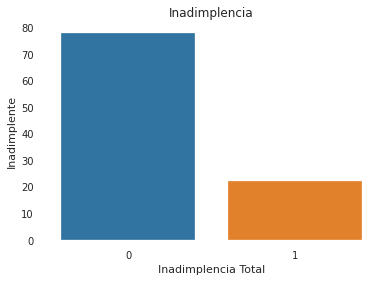

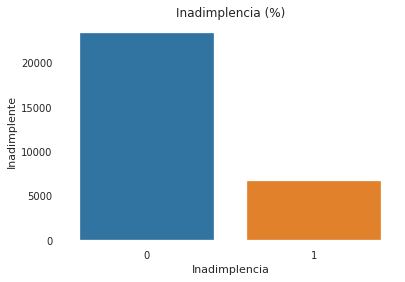

In [17]:
ax = sns.barplot(x='Inadimplente', y='Inadimplente', data=df_input, estimator=lambda x: len(x) / len(df_input) * 100)
plt.title('Inadimplencia')
ax.set(xlabel='Inadimplencia Total')
plt.show()

ax = sns.barplot(x='Inadimplente', y='Inadimplente', data=df_input, estimator=lambda x: len(x))
plt.title('Inadimplencia (%)')
ax.set(xlabel='Inadimplencia')
plt.show()

Text(0.5, 1.0, 'Idade das pessoas do experimento')

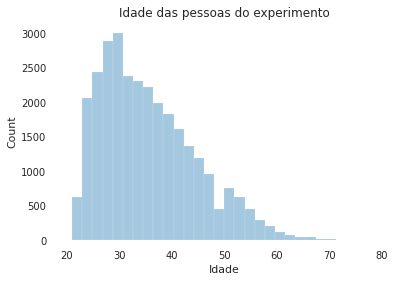

In [18]:
sns.distplot(df_input['Idade'].dropna(), bins=30, kde=False)
plt.ylabel('Count')
plt.title('Idade das pessoas do experimento')

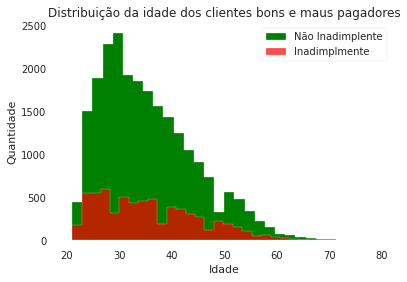

In [19]:
plt.hist(df_input['Idade'][(df_input['Inadimplente'] == 0)].dropna(), bins=30, label='Não Inadimplente', histtype='stepfilled', color='green')
plt.hist(df_input['Idade'][(df_input['Inadimplente'] == 1)].dropna(), bins=30, label='Inadimplmente', alpha=.7, histtype='stepfilled', color='red')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.title('Distribuição da idade dos clientes bons e maus pagadores')
plt.legend()

In [20]:
df_input[['Genero', 'Inadimplente']].groupby(['Genero'], as_index = False).mean()

,Genero,Inadimplente
0,0,0.241672
1,1,0.207763


In [21]:
df_input[['Matrimonio', 'Inadimplente']].groupby(['Matrimonio'], as_index = False).mean()

,Matrimonio,Inadimplente
0,0,0.092593
1,1,0.234717
2,2,0.209283
3,3,0.260062


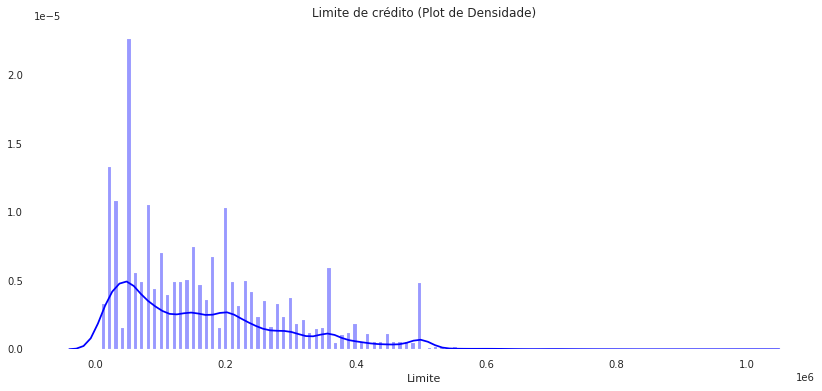

In [22]:
plt.figure(figsize = (14,6))
plt.title('Limite de crédito (Plot de Densidade)')
sns.set_color_codes("pastel")
sns.distplot(df_input['Limite'], kde=True, bins=200, color="blue")
plt.show()

In [23]:
# Distribuição de inadimplencia
'''df_input.hist(bins=50, figsize=(20,15), color='blue')
plt.show()'''

"df_input.hist(bins=50, figsize=(20,15), color='blue')\nplt.show()"

In [24]:
# Distribuição de valores versus inadimplencia
'''df_input.loc[df_input['Inadimplente'] == 1].hist(bins=50, figsize=(20,15), color = 'red')
df_input.loc[df_input['Inadimplente'] == 0].hist(bins=50, figsize=(20,15), color = 'green')
plt.show()'''

"df_input.loc[df_input['Inadimplente'] == 1].hist(bins=50, figsize=(20,15), color = 'red')\ndf_input.loc[df_input['Inadimplente'] == 0].hist(bins=50, figsize=(20,15), color = 'green')\nplt.show()"

In [25]:
## Normalização dos dados
for coluna in ['Limite', 'Idade',
                'Conta_Valor_1', 'Conta_Valor_2', 'Conta_Valor_3', 'Conta_Valor_4', 'Conta_Valor_5', 'Conta_Valor_6',
                'Pagamento_Valor_1', 'Pagamento_Valor_2', 'Pagamento_Valor_3',
                'Pagamento_Valor_4', 'Pagamento_Valor_5', 'Pagamento_Valor_6']:
    
    ## Normaliza dados
    df_input['{}_norm'.format(coluna)] = StandardScaler().fit_transform(df_input[coluna].values.reshape(-1,1))

In [26]:
# X and y
X = df_input[lista_colunas_train_full]
y = df_input.loc[:, 'Inadimplente']

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(24000, 112) (24000,) (6000, 112) (6000,)


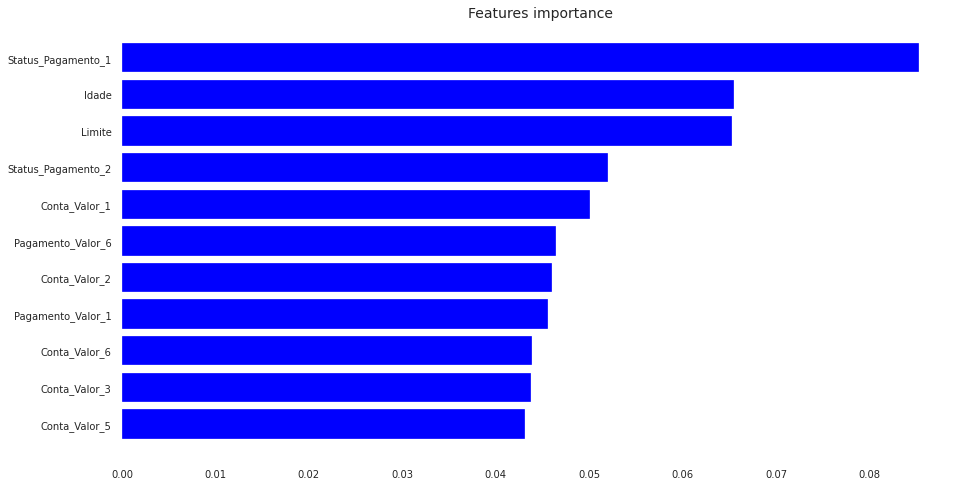

['Status_Pagamento_1', 'Idade', 'Limite', 'Status_Pagamento_2', 'Conta_Valor_1', 'Pagamento_Valor_6', 'Conta_Valor_2', 'Pagamento_Valor_1', 'Conta_Valor_6', 'Conta_Valor_3', 'Conta_Valor_5', 'Pagamento_Valor_5', 'Conta_Valor_4', 'Pagamento_Valor_2', 'Pagamento_Valor_4', 'Pagamento_Valor_3', 'Status_Pagamento_3', 'Status_Pagamento_5', 'Grau_Educacao', 'Status_Pagamento_6', 'Status_Pagamento_4', 'Matrimonio', 'Genero']


,Feature,Feature importance
5,Status_Pagamento_1,0.085301
4,Idade,0.065457
0,Limite,0.065334
6,Status_Pagamento_2,0.051975
11,Conta_Valor_1,0.050067
22,Pagamento_Valor_6,0.046499
12,Conta_Valor_2,0.045974
17,Pagamento_Valor_1,0.045640
16,Conta_Valor_6,0.043844
13,Conta_Valor_3,0.043817


In [27]:
# Feature importances using a Tree based model
colunas_usar = lista_colunas_train_sem_norm_sem_one_hot
X_train_use = X_train[colunas_usar]

clf_Tree = ExtraTreesClassifier()
clf_Tree.fit(X_train_use, y_train)
features_importances_rf = clf_Tree.feature_importances_

df = HelperClass.plot_feature_importance(colunas_usar, features_importances_rf, 15)
print (df['Feature'].values.tolist())
df.head(15)

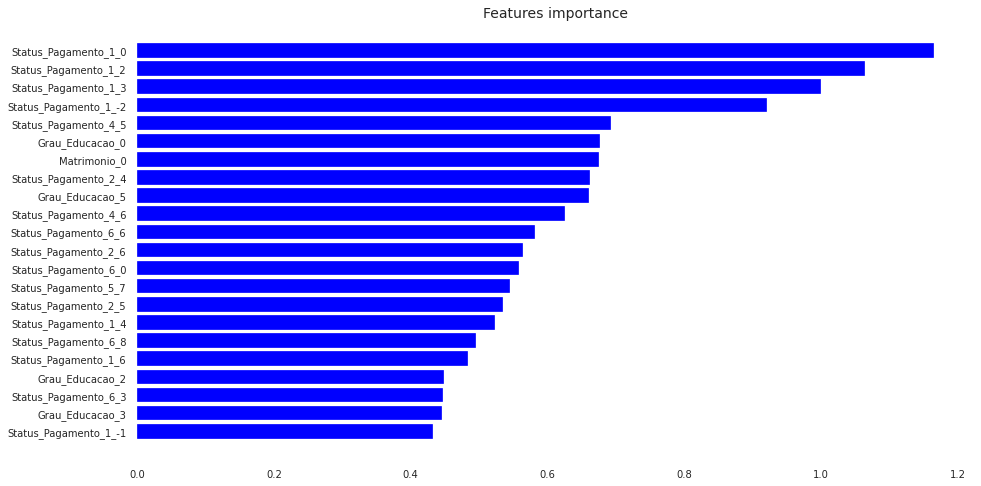

['Status_Pagamento_1_0',
 'Status_Pagamento_1_2',
 'Status_Pagamento_1_3',
 'Status_Pagamento_1_-2',
 'Status_Pagamento_4_5',
 'Grau_Educacao_0',
 'Matrimonio_0',
 'Status_Pagamento_2_4',
 'Grau_Educacao_5',
 'Status_Pagamento_4_6',
 'Status_Pagamento_6_6',
 'Status_Pagamento_2_6',
 'Status_Pagamento_6_0',
 'Status_Pagamento_5_7',
 'Status_Pagamento_2_5',
 'Status_Pagamento_1_4',
 'Status_Pagamento_6_8',
 'Status_Pagamento_1_6',
 'Grau_Educacao_2',
 'Status_Pagamento_6_3',
 'Grau_Educacao_3',
 'Status_Pagamento_1_-1',
 'Grau_Educacao_4',
 'Status_Pagamento_4_1',
 'Grau_Educacao_1',
 'Status_Pagamento_5_4',
 'Status_Pagamento_5_-1',
 'Status_Pagamento_2_1',
 'Status_Pagamento_6_-1',
 'Status_Pagamento_2_8',
 'Status_Pagamento_6_-2',
 'Status_Pagamento_3_6',
 'Status_Pagamento_6_5',
 'Status_Pagamento_4_2',
 'Status_Pagamento_2_7',
 'Status_Pagamento_3_-2',
 'Status_Pagamento_3_8',
 'Status_Pagamento_1_5',
 'Status_Pagamento_5_6',
 'Pagamento_Valor_2_norm',
 'Status_Pagamento_5_0',
 'Status_Pagamento_2_-1',
 'Limite_norm',
 'Matrimonio_3',
 'Status_Pagamento_3_-1',
 'Status_Pagamento_6_7',
 'Status_Pagamento_3_4',
 'Status_Pagamento_3_2',
 'Pagamento_Valor_1_norm',
 'Status_Pagamento_3_3',
 'Status_Pagamento_5_-2',
 'Status_Pagamento_3_0',
 'Conta_Valor_2_norm',
 'Status_Pagamento_4_7',
 'Genero',
 'Status_Pagamento_1_1',
 'Status_Pagamento_4_-2',
 'Conta_Valor_3_norm',
 'Conta_Valor_1_norm',
 'Status_Pagamento_4_4',
 'Status_Pagamento_4_8',
 'Status_Pagamento_5_8',
 'Matrimonio_1',
 'Status_Pagamento_1_8',
 'Status_Pagamento_6_2',
 'Grau_Educacao_6',
 'Status_Pagamento_3_5',
 'Conta_Valor_6_norm',
 'Status_Pagamento_5_5',
 'Status_Pagamento_5_2',
 'Pagamento_Valor_3_norm',
 'Conta_Valor_4_norm',
 'Status_Pagamento_2_0',
 'Status_Pagamento_1_7',
 'Pagamento_Valor_6_norm',
 'Status_Pagamento_5_3',
 'Status_Pagamento_3_7',
 'Idade_norm',
 'Status_Pagamento_2_-2',
 'Status_Pagamento_2_2',
 'Status_Pagamento_6_4',
 'Status_Pagamento_3_1',
 'Matrimonio_2',
 'Pagamento_Valor_4_norm',
 'Status_Pagamento_4_0',
 'Status_Pagamento_4_3',
 'Status_Pagamento_2_3',
 'Conta_Valor_5_norm',
 'Pagamento_Valor_5_norm',
 'Status_Pagamento_4_-1']

In [28]:
# Feature importances using Logistic Regression
colunas_usar = lista_colunas_train_com_norm_com_one_hot
X_train_use = X_train[colunas_usar]

clf_LR = LogisticRegression()
clf_LR.fit(X_train_use, y_train)
features_importances_logit = abs(clf_LR.coef_[0])

df = HelperClass.plot_feature_importance(colunas_usar, features_importances_logit, 15)
df['Feature'].values.tolist()

## Logistic Regression

Best Params: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l1'}
Best AUC: 0.7649527500652192
***********************
Metrics Report:
***********************
Classification Report:
***********************
  True Positive     761
  True Negative    3869
 False Negative     543
 False Positive     827
       Accuracy  0.7717
      Precision  0.4792
         Recall  0.5836
    Specificity  0.8239
       F1 Score  0.5263
  Roc Auc Score  0.7651
***********************
Confusion matrix, without normalization:


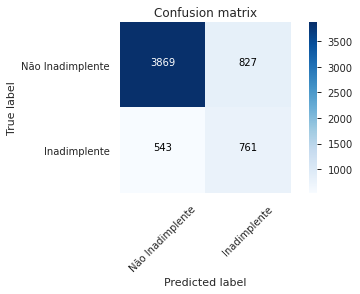

***********************
Roc Curve:
***********************


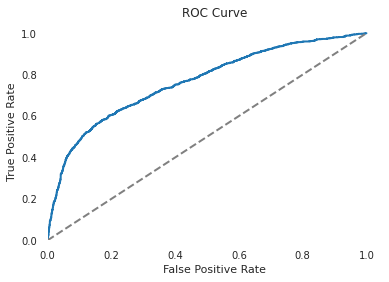

***********************
Precision Recall Curve:
***********************


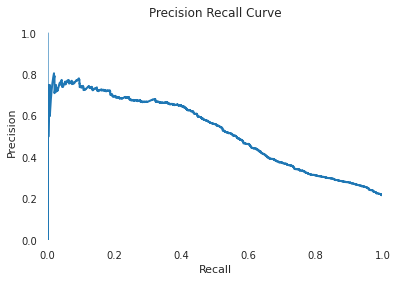

In [29]:
# Logistic Regression
# Grid Search for best auc

colunas_usar = lista_top_vars_com_norm_com_onehot
X_train_use = X_train[colunas_usar]
X_test_use = X_test[colunas_usar]

clf_LR = LogisticRegression()


param_grid = {
            'penalty': ['l1'], 
            'class_weight': ['balanced'], 
            'C': [10]
            }

clf_LR_grid_search = GridSearchCV(estimator = clf_LR,
                                  param_grid = param_grid,
                                  scoring = 'roc_auc',
                                  cv=5,
                                  n_jobs = -1)

clf_LR_grid_search.fit(X_train_use, y_train)

print ('Best Params:', clf_LR_grid_search.best_params_)
print ('Best AUC:', clf_LR_grid_search.best_score_)

# Fit and Predict
y_pred = clf_LR_grid_search.predict(X_test_use)
y_scores_LR = clf_LR_grid_search.predict_proba(X_test_use)[:,1]

# Show results
HelperClass.show_full_classification_report(y_test, y_pred, y_scores_LR, classes)

## Árvore de Decisão

Best Params: {'criterion': 'entropy', 'max_depth': 6}
Best AUC: 0.7486980805720641
***********************
Metrics Report:
***********************
Classification Report:
***********************
  True Positive     470
  True Negative    4459
 False Negative     834
 False Positive     237
       Accuracy  0.8215
      Precision  0.6648
         Recall  0.3604
    Specificity  0.9495
       F1 Score  0.4674
  Roc Auc Score  0.7555
***********************
Confusion matrix, without normalization:


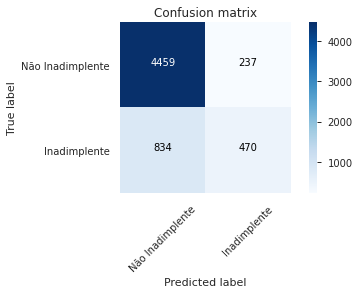

***********************
Roc Curve:
***********************


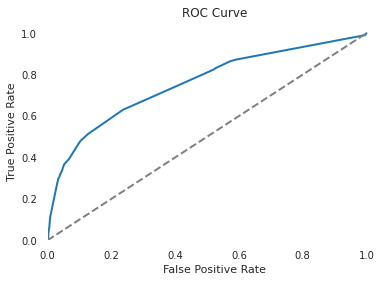

***********************
Precision Recall Curve:
***********************


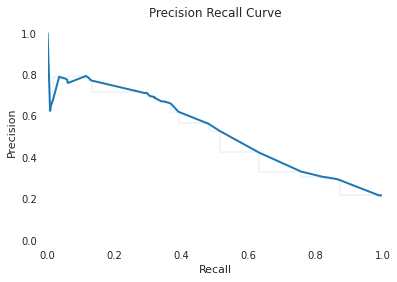

In [30]:
# Arvore de Decisao
colunas_usar = lista_colunas_train_com_norm_com_one_hot
X_train_use = X_train[colunas_usar]
X_test_use = X_test[colunas_usar]

clf_Tree = DecisionTreeClassifier()

param_grid = {
            'criterion':['entropy'],
            'max_depth': [6]
            }

clf_Tree_grid_search = GridSearchCV(estimator = clf_Tree,
                                  param_grid = param_grid,
                                  scoring = 'roc_auc',
                                  cv=5,
                                  n_jobs = -1)

clf_Tree_grid_search.fit(X_train_use, y_train)

print ('Best Params:', clf_Tree_grid_search.best_params_)
print ('Best AUC:', clf_Tree_grid_search.best_score_)

# Fit and Predict
y_pred = clf_Tree_grid_search.predict(X_test_use)
y_scores_Tree = clf_Tree_grid_search.predict_proba(X_test_use)[:,1]

# Show results
HelperClass.show_full_classification_report(y_test, y_pred, y_scores_Tree, classes)

## K Nearest Neighbors Classifier

Best Params: {'n_neighbors': 25, 'weights': 'uniform'}
Best AUC: 0.7518482347181809
***********************
Metrics Report:
***********************
Classification Report:
***********************
  True Positive     466
  True Negative    4430
 False Negative     838
 False Positive     266
       Accuracy  0.8160
      Precision  0.6366
         Recall  0.3574
    Specificity  0.9434
       F1 Score  0.4578
  Roc Auc Score  0.7582
***********************
Confusion matrix, without normalization:


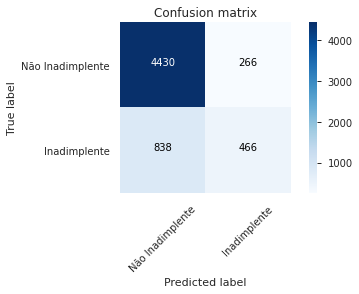

***********************
Roc Curve:
***********************


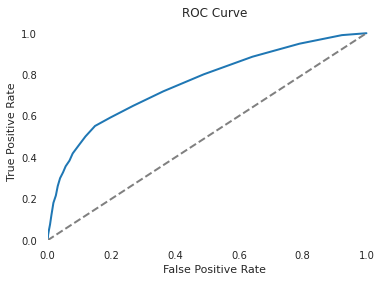

***********************
Precision Recall Curve:
***********************


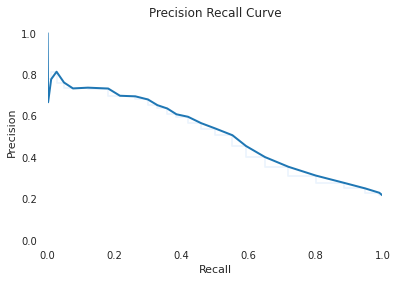

In [31]:
# Knn
colunas_usar = lista_top_vars_com_norm_com_onehot
X_train_use = X_train[colunas_usar]
X_test_use = X_test[colunas_usar]

clf_kNN = KNeighborsClassifier()

param_grid = {
            'n_neighbors': [5, 15, 25],
            'weights': ['uniform']
            }

clf_kNN_grid_search = GridSearchCV(estimator = clf_kNN,
                                  param_grid = param_grid,
                                  scoring = 'roc_auc',
                                  cv=5,
                                  n_jobs = -1)

clf_kNN_grid_search.fit(X_train_use, y_train)

print ('Best Params:', clf_kNN_grid_search.best_params_)
print ('Best AUC:', clf_kNN_grid_search.best_score_)

# Fit and Predict
y_pred = clf_kNN_grid_search.predict(X_test_use)
y_scores_kNN = clf_kNN_grid_search.predict_proba(X_test_use)[:,1]

# Show results
HelperClass.show_full_classification_report(y_test, y_pred, y_scores_kNN, classes)

## Gaussian Naive Bayes

***********************
Metrics Report:
***********************
Classification Report:
***********************
  True Positive     433
  True Negative    4499
 False Negative     871
 False Positive     197
       Accuracy  0.8220
      Precision  0.6873
         Recall  0.3321
    Specificity  0.9580
       F1 Score  0.4478
  Roc Auc Score  0.7304
***********************
Confusion matrix, without normalization:


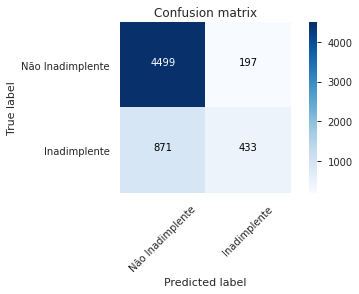

***********************
Roc Curve:
***********************


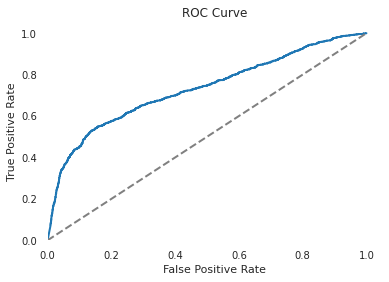

***********************
Precision Recall Curve:
***********************


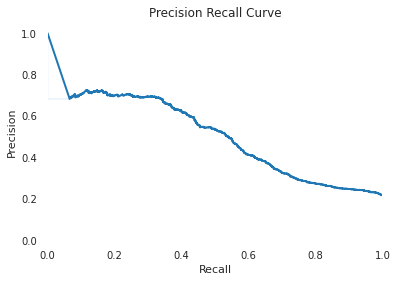

In [32]:
# Gaussian Naive Bayes
colunas_usar = lista_top_vars_com_norm_com_onehot
X_train_use = X_train[colunas_usar]
X_test_use = X_test[colunas_usar]

clf_Gaussian_NB = GaussianNB()
clf_Gaussian_NB.fit(X_train_use, y_train)

# Fit and Predict
y_pred = clf_Gaussian_NB.predict(X_test_use)
y_scores_Gaussian_NB = clf_Gaussian_NB.predict_proba(X_test_use)[:,1]

# Show results
HelperClass.show_full_classification_report(y_test, y_pred, y_scores_Gaussian_NB, classes)

## Random Forest Classifier

Best Params: {'bootstrap': False, 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 500, 'min_samples_split': 10, 'n_estimators': 200}
Best AUC: 0.777163679424336
***********************
Metrics Report:
***********************
Classification Report:
***********************
  True Positive     362
  True Negative    4504
 False Negative     942
 False Positive     192
       Accuracy  0.8110
      Precision  0.6534
         Recall  0.2776
    Specificity  0.9591
       F1 Score  0.3897
  Roc Auc Score  0.7799
***********************
Confusion matrix, without normalization:


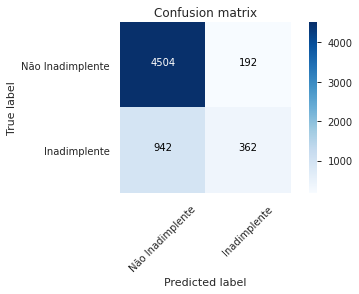

***********************
Roc Curve:
***********************


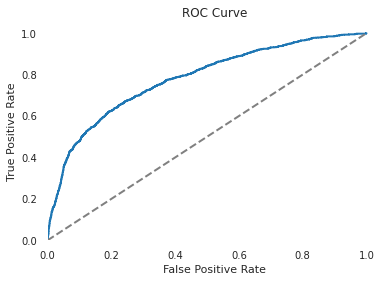

***********************
Precision Recall Curve:
***********************


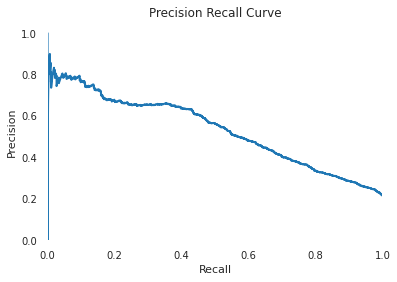

In [33]:
# Random Forest
colunas_usar = lista_colunas_train_sem_norm_sem_one_hot
X_train_use = X_train[colunas_usar]
X_test_use = X_test[colunas_usar]

clf_RF = RandomForestClassifier()

param_grid = {'bootstrap': [False],
             'max_depth': [8],
             'max_features': ['auto'],
             'min_samples_leaf': [500],
             'min_samples_split': [10],
             'n_estimators': [200]
             }

clf_RF_grid_search = GridSearchCV(estimator = clf_RF,
                                  param_grid = param_grid,
                                  scoring = 'roc_auc',
                                  cv=5,
                                  n_jobs = -1)

clf_RF_grid_search.fit(X_train_use, y_train)

print ('Best Params:', clf_RF_grid_search.best_params_)
print ('Best AUC:', clf_RF_grid_search.best_score_)

# Fit and Predict
y_pred = clf_RF_grid_search.predict(X_test_use)
y_scores_RF = clf_RF_grid_search.predict_proba(X_test_use)[:,1]

# Show results
HelperClass.show_full_classification_report(y_test, y_pred, y_scores_RF, classes)

## LightGBM

{'boosting_type': 'gbdt', 'learning_rate': 0.08, 'n_estimators': 100, 'num_leaves': 16, 'objective': 'binary', 'random_state': 42, 'reg_alpha': 1, 'reg_lambda': 1}
0.7806052469269588


/home/yan/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/yan/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


***********************
Metrics Report:
***********************
Classification Report:
***********************
  True Positive     498
  True Negative    4429
 False Negative     806
 False Positive     267
       Accuracy  0.8212
      Precision  0.6510
         Recall  0.3819
    Specificity  0.9431
       F1 Score  0.4814
  Roc Auc Score  0.7872
***********************
Confusion matrix, without normalization:


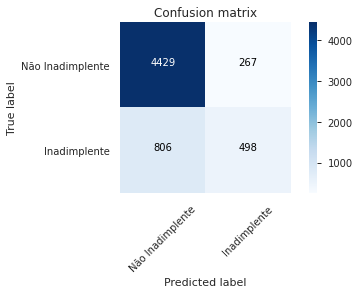

***********************
Roc Curve:
***********************


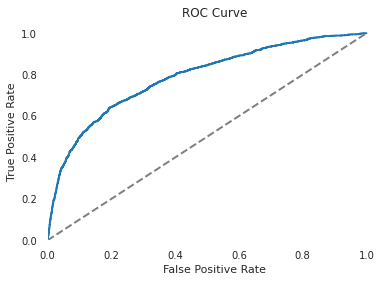

***********************
Precision Recall Curve:
***********************


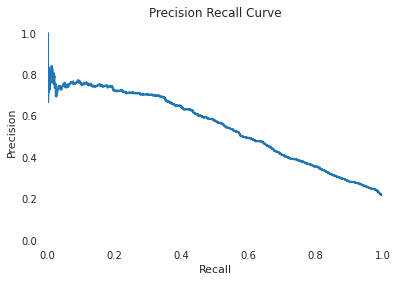

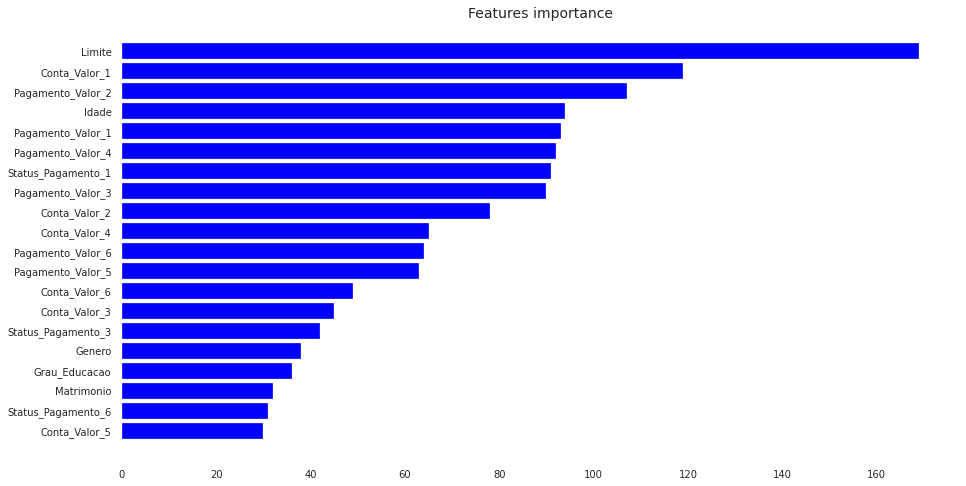

['Limite',
 'Conta_Valor_1',
 'Pagamento_Valor_2',
 'Idade',
 'Pagamento_Valor_1',
 'Pagamento_Valor_4',
 'Status_Pagamento_1',
 'Pagamento_Valor_3',
 'Conta_Valor_2',
 'Conta_Valor_4',
 'Pagamento_Valor_6',
 'Pagamento_Valor_5',
 'Conta_Valor_6',
 'Conta_Valor_3',
 'Status_Pagamento_3',
 'Genero',
 'Grau_Educacao',
 'Matrimonio',
 'Status_Pagamento_6',
 'Conta_Valor_5',
 'Status_Pagamento_5',
 'Status_Pagamento_4',
 'Status_Pagamento_2']

In [34]:
# lightgbm object
colunas_usar = lista_colunas_train_sem_norm_sem_one_hot
X_train_use = X_train[colunas_usar]
X_test_use = X_test[colunas_usar]

lgb_train_data = lgb.Dataset(X_train_use,
                             label=y_train,
                             categorical_feature=['Genero', 'Grau_Educacao', 'Matrimonio'])

# Parameters
params_set = {'num_class': 1,
          'metric': 'binary_error',
          'boosting_type': 'gbdt',
          'max_depth': -1,
          'objective': 'binary',
          'nthread': 5,
          'max_bin': 400,
          'subsample_for_bin': 100,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'min_data_in_leaf': 1000
          }


# Create parameters to search
param_grid = {
    'learning_rate': [0.08],
    'n_estimators': [100],
    'num_leaves': [8, 16],
    'reg_alpha': [1],
    'reg_lambda': [1],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state': [42]
    }

# LightGBM Classifier
clf_lgbm = lgb.LGBMClassifier(boosting_type= 'gbdt',
          max_depth = params_set['max_depth'],
          max_bin = params_set['max_bin'],
          subsample_freq = params_set['subsample_freq'],
          min_data_in_leaf = params_set['min_data_in_leaf'],
          objective = params_set['objective'],
          n_jobs = -1)


# parametros
clf_lgbm.get_params().keys()

# Grid search
clf_grid_search = GridSearchCV(estimator = clf_lgbm,
                                  param_grid = param_grid,
                                  scoring = 'roc_auc',
                                  cv = 5,
                                  n_jobs = -1)

clf_grid_search.fit(X_train_use, y_train)

# Print the best parameters found
print(clf_grid_search.best_params_)
print(clf_grid_search.best_score_)

# Apply best parameters from grid search
params_set['learning_rate'] = clf_grid_search.best_params_['learning_rate']
params_set['num_leaves'] = clf_grid_search.best_params_['num_leaves']
params_set['n_estimators'] = clf_grid_search.best_params_['n_estimators']
params_set['random_state'] = clf_grid_search.best_params_['random_state']

# Training
clf_lgbm = lgb.train(params_set, lgb_train_data, 100)

# Prediction with probabilities
y_scores_LightGBM = clf_lgbm.predict(X_test_use)

# Predictions binary
threshold = 0.5
y_pred = np.where(y_scores_LightGBM > threshold, 1, 0)

# Show results
HelperClass.show_full_classification_report(y_test, y_pred, y_scores_LightGBM, classes)

# importancia das variaveis
features_importances_lgbm = clf_lgbm.feature_importance()
df = HelperClass.plot_feature_importance(colunas_usar, features_importances_lgbm, 15)
df['Feature'].values.tolist()

## Keras ANN

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                3072      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 44,673
Trainable params: 44,673
Non-trainable params: 0
_________________________________________________________________
None
Train on 16800 samples, validate on 7200 samples
Epoch 1/3
16800/16800 [==============================] - 1s 39us/step - loss: 0.4613 - accuracy: 0.8049 - val_loss: 0.4412 - val_accuracy: 0.8210
Epoch 2/3
16800/16800 [=========================

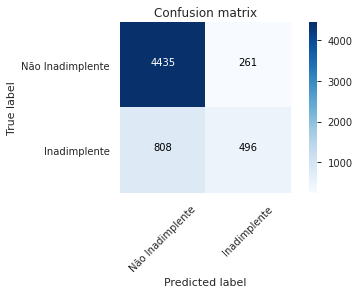

***********************
Roc Curve:
***********************


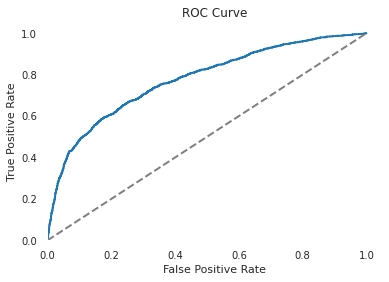

***********************
Precision Recall Curve:
***********************


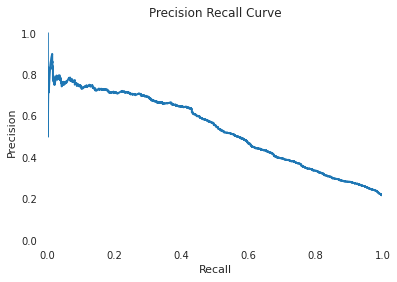

In [35]:
# Keras Artificial Neural Network (ANN) model
colunas_usar = lista_top_vars_com_norm_com_onehot
X_train_use = X_train[colunas_usar]
X_test_use = X_test[colunas_usar]

model = Sequential()
model.add(Dense(64, activation='relu',
                kernel_initializer = keras.initializers.glorot_uniform(seed=None),
                input_dim=(len(colunas_usar))))


model.add(Dense(128, activation='relu',
               kernel_initializer = keras.initializers.glorot_uniform(seed=None)))


model.add(Dense(256, activation='relu',
               kernel_initializer = keras.initializers.glorot_uniform(seed=None)))


model.add(Dense(1, activation='sigmoid',
               kernel_initializer = keras.initializers.glorot_uniform(seed=None)))

print(model.summary())


# Model compile
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# Model fit
model.fit(X_train_use, y_train,
          epochs=3,
          batch_size=128,
          validation_split = 0.3)



# Predict
y_scores_ANN = model.predict(X_test_use)
y_pred = [1 if element > 0.5 else 0 for element in y_scores_ANN]

# Show results
HelperClass.show_full_classification_report(y_test, y_pred, y_scores_ANN, classes)

***********************
All Roc Curves:
***********************


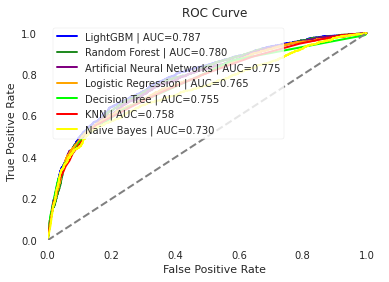

In [36]:
# Roc curve for all models
HelperClass.stars()
print ("All Roc Curves:")
HelperClass.stars()


plt.figure()

# LightGBM
fpr, tpr, thresholds = roc_curve(y_test, y_scores_LightGBM)
auc = '{:.3f}'.format(roc_auc_score(y_test, y_scores_LightGBM))
plt.plot(fpr, tpr, label = 'LightGBM | AUC='+str(auc), linewidth = 2, color='blue')

# Random Forest
fpr, tpr, thresholds = roc_curve(y_test, y_scores_RF)
auc = '{:.3f}'.format(roc_auc_score(y_test, y_scores_RF))
plt.plot(fpr, tpr, label = 'Random Forest | AUC='+str(auc), linewidth = 2, color='forestgreen')

# Artificial Neural Network (ANN)
fpr, tpr, thresholds = roc_curve(y_test, y_scores_ANN)
auc = '{:.3f}'.format(roc_auc_score(y_test, y_scores_ANN))
plt.plot(fpr, tpr, label = 'Artificial Neural Networks | AUC='+str(auc), linewidth = 2, color='purple')

# Logistic Regression
fpr, tpr, thresholds = roc_curve(y_test, y_scores_LR)
auc = '{:.3f}'.format(roc_auc_score(y_test, y_scores_LR))
plt.plot(fpr, tpr, label = 'Logistic Regression | AUC='+str(auc), linewidth = 2, color='orange')

# Decision Tree
fpr, tpr, thresholds = roc_curve(y_test, y_scores_Tree)
auc = '{:.3f}'.format(roc_auc_score(y_test, y_scores_Tree))
plt.plot(fpr, tpr, label = 'Decision Tree | AUC='+str(auc), linewidth = 2, color='lime')

# k Nearest Neighbors
fpr, tpr, thresholds = roc_curve(y_test, y_scores_kNN)
auc = '{:.3f}'.format(roc_auc_score(y_test, y_scores_kNN))
plt.plot(fpr, tpr, label = 'kNN | AUC='+str(auc), linewidth = 2, color='red')

# Multinomial Naive Bayes
fpr, tpr, thresholds = roc_curve(y_test, y_scores_Gaussian_NB)
auc = '{:.3f}'.format(roc_auc_score(y_test, y_scores_Gaussian_NB))
plt.plot(fpr, tpr, label = 'Naive Bayes | AUC='+str(auc), linewidth = 2, color='yellow')

# Plot
rcParams['figure.figsize'] = 12, 10
plt.title('ROC Curve')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1], 'k--', linewidth = 2, color='grey')
plt.legend(loc='upper left')
plt.show()

## Explicabilidade do modelo usando Shap Values

In [37]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
colunas_usar = lista_colunas_train_sem_norm_sem_one_hot
X_train_use = X_train[colunas_usar]
X_test_use = X_test[colunas_usar]

explainer = shap.TreeExplainer(clf_lgbm)
shap_values = explainer.shap_values(X_test_use)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test_use.iloc[0,:])

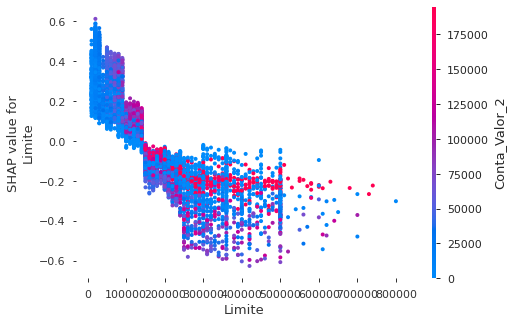

In [38]:
# create a dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot('Limite', shap_values, X_test_use)

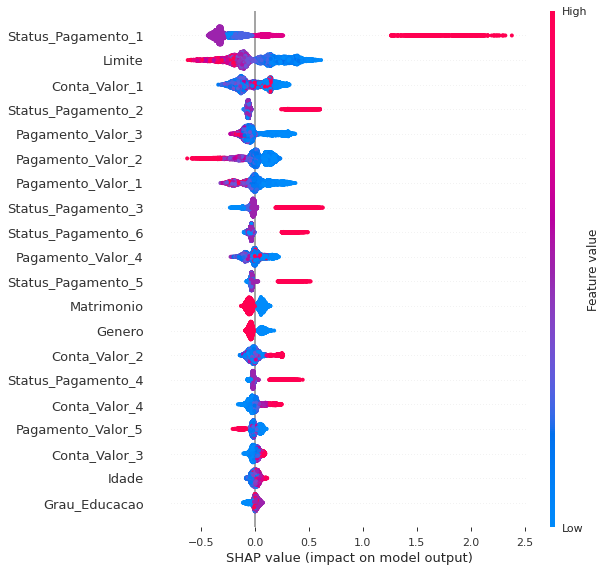

In [39]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_test_use)

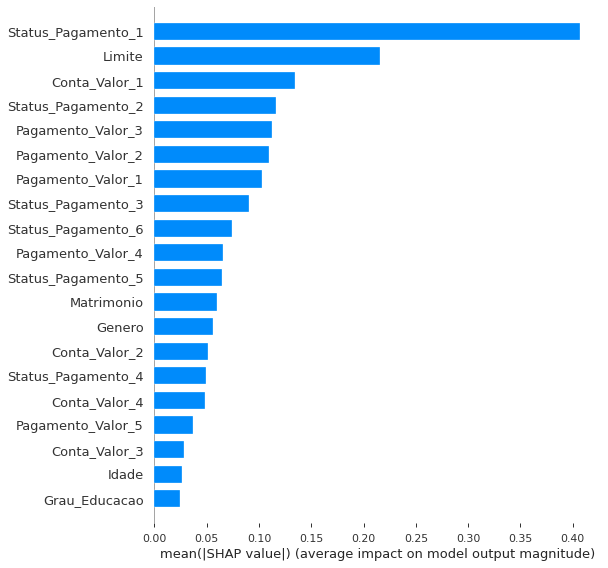

In [40]:
shap.summary_plot(shap_values, X_test_use, plot_type="bar")

## Elasticidade da Curva

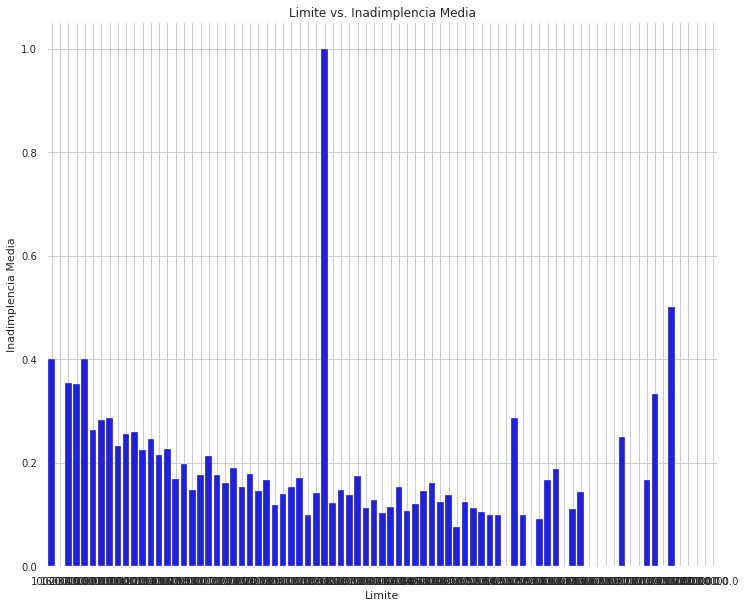

In [41]:
df_limite_medio = pd.DataFrame(df_input.groupby('Limite')['Inadimplente'].mean()).reset_index()
df_limite_medio.columns = ['Limite', 'Inadimplencia_Media']
sns.barplot(x="Limite", y="Inadimplencia_Media", data=df_limite_medio, color='blue')
plt.xlabel('Limite')
plt.ylabel('Inadimplencia Media')
plt.title('Limite vs. Inadimplencia Media')
plt.grid()
plt.show()